Now we have a clean dataset saved. We are going to use it to do mathematical operations and try to find correlations.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

with open('Data_Customers_Cleaned.csv','r') as data:
    Data_Cleaned = pd.read_csv(data,delimiter = ',')



Data_Cleaned

,CLIENTNUM,Attrited_Customer,Existing_Customer,Female,Male,Customer_Age,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Dependent_count_0,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Card_Silver,Card_Blue,Card_Gold,Card_Platinum,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_2
0,768805383,0,1,0,1,45,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,0,1,1,0,49,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,0,1,0,1,51,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,0,1,1,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,0,1,0,1,40,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,1,0,1,50,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,1,0,0,1,41,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,1,0,1,0,44,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,1,0,0,1,30,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


To find a patter or correlation, we just need the customers that have already left.

In [2]:
Data_Cleaned_Attrited = Data_Cleaned[Data_Cleaned['Attrited_Customer'] == 1]

Data_Cleaned_Attrited

,CLIENTNUM,Attrited_Customer,Existing_Customer,Female,Male,Customer_Age,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Dependent_count_0,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Card_Silver,Card_Blue,Card_Gold,Card_Platinum,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_2
21,708508758,1,0,1,0,62,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,1,0,1,0,66,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,1,0,1,0,54,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,40,2,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,1,0,0,1,56,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,36,1,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,1,0,0,1,48,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,35,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,1,0,1,0,55,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0.99691,0.003088
10123,710638233,1,0,0,1,41,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.99527,0.004729
10124,716506083,1,0,1,0,44,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.99788,0.002118
10125,717406983,1,0,0,1,30,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.99671,0.003294


First we are going to take care of the easy part : the demographic factors.
Let's see how much men or women left the bank, to see if there is a clear indication here.

In [3]:
Data_Cleaned_Attrited['Female'].sum()

930

In [4]:
Data_Cleaned_Attrited['Male'].sum()

697

We can see that more women have left, but the numder are not too far from one to another, we can keep that in mind for later, but as that point, it's not enough. Let's try to see concerning the age.

In [5]:
round(Data_Cleaned_Attrited['Customer_Age'].mean(),2)

46.66

Let's explore this compared to the existing customer.

In [6]:
Data_Cleaned_Existing = Data_Cleaned[Data_Cleaned['Existing_Customer'] == 1]
Data_Cleaned_Existing

,CLIENTNUM,Attrited_Customer,Existing_Customer,Female,Male,Customer_Age,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Dependent_count_0,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Card_Silver,Card_Blue,Card_Gold,Card_Platinum,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_2
0,768805383,0,1,0,1,45,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,0,1,1,0,49,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,0,1,0,1,51,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,0,1,1,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,0,1,0,1,40,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,0,1,0,1,46,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,36,1,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170,0.000192,0.99981
10117,712503408,0,1,0,1,57,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,40,6,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106,0.000516,0.99948
10120,710841183,0,1,0,1,54,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,0.000038,0.99996
10121,713899383,0,1,1,0,56,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,0.000148,0.99985


In [7]:
round(Data_Cleaned_Existing['Customer_Age'].mean(),2)

46.26

As we can see, the mean age is similar for both of them. The issue is probably not here also. Let's continue by watching the marital status.
To have a better idea, we are going to compare the ratio in each group Existing customers and attrited customers and see if they are similar.
We will then do the same with the education level, income, dependent count and card category.
Therefore, let's create a function that will calculate the percentage for us in the determined column :

In [8]:
def percentage_calculation(DataFrame_column):
    percentage = round((DataFrame_column.sum() *100) / len(DataFrame_column),2)
    return percentage

def percentage_by_type(labels,df_customer_type):
    percentage_dict = {}
    for column in labels:
        if column in df_customer_type.columns:
            result = percentage_calculation(df_customer_type[column])
            percentage_dict[column] = result
    return percentage_dict

In [9]:
Matrital_label = ['Divorced','Married','Single']

Matrital_percent_Attrited = percentage_by_type(Matrital_label,Data_Cleaned_Attrited)

Matrital_percent_Attrited

{'Divorced': 7.44, 'Married': 43.58, 'Single': 41.06}

In [10]:
Matrital_percent_Existing = percentage_by_type(Matrital_label,Data_Cleaned_Existing)

Matrital_percent_Existing

{'Divorced': 7.38, 'Married': 46.8, 'Single': 38.53}

Here we can see that the percentage are really close, it's not different enough to be an indicator.

In [11]:
Education_label = ['College','Doctorate','Graduate','High School','Post-Graduate','Uneducated']

Education_percent_Attrited = percentage_by_type(Education_label,Data_Cleaned_Attrited)

Education_percent_Attrited


{'College': 9.47,
 'Doctorate': 5.84,
 'Graduate': 29.93,
 'High School': 18.81,
 'Post-Graduate': 5.65,
 'Uneducated': 14.57}

In [12]:
Education_percent_Existing = percentage_by_type(Education_label,Data_Cleaned_Existing)

Education_percent_Existing

{'College': 10.11,
 'Doctorate': 4.19,
 'Graduate': 31.07,
 'High School': 20.08,
 'Post-Graduate': 4.99,
 'Uneducated': 14.71}

Once again, it doesn't change a lot, let's check for the income now.

In [13]:
Income_label = ['Income_$120K +', 'Income_$40K - $60K', 'Income_$60K - $80K','Income_$80K - $120K','Income_Less than $40K']
Income_percent_Attrited = percentage_by_type(Income_label,Data_Cleaned_Attrited)

Income_percent_Attrited

{'Income_$120K +': 7.74,
 'Income_$40K - $60K': 16.66,
 'Income_$60K - $80K': 11.62,
 'Income_$80K - $120K': 14.87,
 'Income_Less than $40K': 37.62}

In [14]:
Income_percent_Existing = percentage_by_type(Income_label,Data_Cleaned_Existing)

Income_percent_Existing

{'Income_$120K +': 7.07,
 'Income_$40K - $60K': 17.87,
 'Income_$60K - $80K': 14.27,
 'Income_$80K - $120K': 15.21,
 'Income_Less than $40K': 34.69}

Still not enough variation to be an indicator. Let's see the dependent count now:

In [15]:
Dependent_count_label = ['Dependent_count_0','Dependent_count_1','Dependent_count_2','Dependent_count_3','Dependent_count_4','Dependent_count_5']

Dependent_percent_Attrited = percentage_by_type(Dependent_count_label,Data_Cleaned_Attrited)

Dependent_percent_Attrited

{'Dependent_count_0': 8.3,
 'Dependent_count_1': 16.53,
 'Dependent_count_2': 25.63,
 'Dependent_count_3': 29.63,
 'Dependent_count_4': 15.98,
 'Dependent_count_5': 3.93}

In [16]:
Dependent_percent_Existing = percentage_by_type(Dependent_count_label,Data_Cleaned_Existing)

Dependent_percent_Existing

{'Dependent_count_0': 9.05,
 'Dependent_count_1': 18.46,
 'Dependent_count_2': 26.33,
 'Dependent_count_3': 26.47,
 'Dependent_count_4': 15.46,
 'Dependent_count_5': 4.24}

In [17]:
Card_Type_label = ['Card_Silver','Card_Blue','Card_Gold','Card_Platinum']

Card_Type_percent_Attrited = percentage_by_type(Card_Type_label,Data_Cleaned_Attrited)

Card_Type_percent_Attrited

{'Card_Silver': 5.04,
 'Card_Blue': 93.36,
 'Card_Gold': 1.29,
 'Card_Platinum': 0.31}

In [18]:
Card_Type_percent_Existing = percentage_by_type(Card_Type_label,Data_Cleaned_Existing)

Card_Type_percent_Existing

{'Card_Silver': 5.56,
 'Card_Blue': 93.14,
 'Card_Gold': 1.12,
 'Card_Platinum': 0.18}

None of them looks like indicators since all the ratio are the same. Knowing that we can finally go deeper in the financial behavior of each client.
First, let's check the utilization_Ratio.

In [19]:
round(Data_Cleaned_Attrited['Avg_Utilization_Ratio'].mean(),2)

0.16

In [20]:
round(Data_Cleaned_Existing['Avg_Utilization_Ratio'].mean(),2)

0.3

This is interesting, we can see that the people who left, in general used two time less their cards compare to the one who are still here.
This utilization ratio could be a good point to figure if someone is going to left or not.

But this utilisation can also be explained with something easy, if someone left the bank, his utilisation is going to drop. So to validate this point, we are going to calculate an average while the client was active in the past 12 months.

In [21]:
for rows in Data_Cleaned:
    Data_Cleaned['Months_Active_12_months'] = 12 - Data_Cleaned['Months_Inactive_12_mon']

Data_Cleaned

,CLIENTNUM,Attrited_Customer,Existing_Customer,Female,Male,Customer_Age,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Dependent_count_0,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Card_Silver,Card_Blue,Card_Gold,Card_Platinum,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_2,Months_Active_12_months
0,768805383,0,1,0,1,45,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,11
1,818770008,0,1,1,0,49,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,11
2,713982108,0,1,0,1,51,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,11
3,769911858,0,1,1,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,8
4,709106358,0,1,0,1,40,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,1,0,1,50,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,10
10123,710638233,1,0,0,1,41,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,10
10124,716506083,1,0,1,0,44,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,9
10125,717406983,1,0,0,1,30,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,9


In [22]:
for rows in Data_Cleaned:
    Data_Cleaned['Average_Transaction_Amount_By_Month'] = round(Data_Cleaned['Total_Trans_Amt'] / Data_Cleaned['Months_Active_12_months'],2)

Data_Cleaned

,CLIENTNUM,Attrited_Customer,Existing_Customer,Female,Male,Customer_Age,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Dependent_count_0,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Card_Silver,Card_Blue,Card_Gold,Card_Platinum,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_2,Months_Active_12_months,Average_Transaction_Amount_By_Month
0,768805383,0,1,0,1,45,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,11,104.00
1,818770008,0,1,1,0,49,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,11,117.36
2,713982108,0,1,0,1,51,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,11,171.55
3,769911858,0,1,1,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,8,146.38
4,709106358,0,1,0,1,40,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,11,74.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,1,0,1,50,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,10,1547.60
10123,710638233,1,0,0,1,41,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,10,876.40
10124,716506083,1,0,1,0,44,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,9,1143.44
10125,717406983,1,0,0,1,30,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,9,932.78


In [23]:
for rows in Data_Cleaned:
    Data_Cleaned['Average_Transaction_Count_By_Month'] = round(Data_Cleaned['Total_Trans_Ct'] / Data_Cleaned['Months_Active_12_months'],2)

Data_Cleaned

,CLIENTNUM,Attrited_Customer,Existing_Customer,Female,Male,Customer_Age,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Dependent_count_0,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Card_Silver,Card_Blue,Card_Gold,Card_Platinum,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_2,Months_Active_12_months,Average_Transaction_Amount_By_Month,Average_Transaction_Count_By_Month
0,768805383,0,1,0,1,45,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,11,104.00,3.82
1,818770008,0,1,1,0,49,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,11,117.36,3.00
2,713982108,0,1,0,1,51,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,11,171.55,1.82
3,769911858,0,1,1,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,8,146.38,2.50
4,709106358,0,1,0,1,40,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,11,74.18,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,1,0,1,50,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,10,1547.60,11.70
10123,710638233,1,0,0,1,41,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,10,876.40,6.90
10124,716506083,1,0,1,0,44,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,9,1143.44,6.67
10125,717406983,1,0,0,1,30,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,9,932.78,6.89


In [24]:
for rows in Data_Cleaned:
    Data_Cleaned['Average_Ratio_By_Month'] = round(Data_Cleaned['Average_Transaction_Amount_By_Month'] / Data_Cleaned['Credit_Limit'],2)

Data_Cleaned

,CLIENTNUM,Attrited_Customer,Existing_Customer,Female,Male,Customer_Age,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Dependent_count_0,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Card_Silver,Card_Blue,Card_Gold,Card_Platinum,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_2,Months_Active_12_months,Average_Transaction_Amount_By_Month,Average_Transaction_Count_By_Month,Average_Ratio_By_Month
0,768805383,0,1,0,1,45,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,11,104.00,3.82,0.01
1,818770008,0,1,1,0,49,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,11,117.36,3.00,0.01
2,713982108,0,1,0,1,51,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,11,171.55,1.82,0.05
3,769911858,0,1,1,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,8,146.38,2.50,0.04
4,709106358,0,1,0,1,40,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,11,74.18,2.55,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,1,0,1,50,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,10,1547.60,11.70,0.39
10123,710638233,1,0,0,1,41,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,10,876.40,6.90,0.20
10124,716506083,1,0,1,0,44,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,9,1143.44,6.67,0.21
10125,717406983,1,0,0,1,30,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,9,932.78,6.89,0.18


Now that we have the average by months while the customer was active at the bank, let's redo those calculs.

In [25]:
Data_Cleaned_Attrited = Data_Cleaned[Data_Cleaned['Attrited_Customer'] == 1]
Data_Cleaned_Existing = Data_Cleaned[Data_Cleaned['Existing_Customer'] == 1]

Avg_ratio_Attrited = round(Data_Cleaned_Attrited['Average_Ratio_By_Month'].mean(),2)
Avg_ratio_Attrited


0.08

In [26]:
Avg_ratio_Existing = round(Data_Cleaned_Existing['Average_Ratio_By_Month'].mean(),2)
Avg_ratio_Existing

0.11

We can see the average ratio is less for people who left. The people still in the bank used around 11% of their available credit montlhy, where the ones who left used around 8%.
It's not that much but could be significant, so less check the transaction count and transaction amount.

In [27]:
round(Data_Cleaned_Attrited['Average_Transaction_Amount_By_Month'].mean(),2)

335.26

In [28]:
round(Data_Cleaned_Existing['Average_Transaction_Amount_By_Month'].mean(),2)

484.16

By average, we can see the people who left spent around 150 dollars less by months also. It's technically connected to the ratio, so let's check the transaction count now.

In [29]:
Avg_tran_count_attrited =round(Data_Cleaned_Attrited['Average_Transaction_Count_By_Month'].mean(),2)
Avg_tran_count_attrited

4.88

In [30]:
Avg_tran_count_existing = round(Data_Cleaned_Existing['Average_Transaction_Count_By_Month'].mean(),2)
Avg_tran_count_existing

7.15

All of the people staying use more their cards montlhy by average. So we have now 3 indicators telling us if someone starts to match the comportement of the one who left :

- They spend less money overall by month,
- Their ratio is smaller,
- Their number of transaction is smaller

Let's check other criterias :

In [31]:
round(Data_Cleaned_Attrited['Credit_Limit'].mean(),2)

8136.04

In [32]:
round(Data_Cleaned_Existing['Credit_Limit'].mean(),2)

8726.88

We can see that the credit limit is also higher for the people who stayed by around 600 dollars. It's not a comportment indicator but it could be a solution to help with the fidelity.
But first, we have to verify if we have values that can invalidate our calcul:

In [33]:
round(Data_Cleaned_Attrited['Credit_Limit'].min(),2)

1438.3

In [34]:
round(Data_Cleaned_Attrited['Credit_Limit'].max(),2)

34516.0

We can see that the max is way higher than the min for the credit limit. Let's see how much of the them are above the mean to see if we have something to dig there.

In [35]:
above_credit_avg = 0
under_credit_avg = 0

for rows in Data_Cleaned_Attrited['Credit_Limit']:
    if rows > Data_Cleaned_Attrited['Credit_Limit'].mean():
        above_credit_avg += 1
    else:
        under_credit_avg +=1

above_credit_avg

495

In [36]:
under_credit_avg

1132

Let's go deeper with this information

In [37]:
Credit_Attri_Q1 = Data_Cleaned_Attrited['Credit_Limit'].quantile(q=0.25)
Credit_Attri_Q3 = Data_Cleaned_Attrited['Credit_Limit'].quantile(q=0.75)

Credit_Attri_IQR = Credit_Attri_Q3 - Credit_Attri_Q1

borne_inf = Credit_Attri_Q1 - 1.5 * Credit_Attri_IQR
borne_sup = Credit_Attri_Q3 + 1.5 * Credit_Attri_IQR

abnormal_numbers = Data_Cleaned_Attrited[(Data_Cleaned_Attrited['Credit_Limit'] < borne_inf) | (Data_Cleaned_Attrited['Credit_Limit'] > borne_sup)].sort_values(by= 'Credit_Limit', ascending = False)
abnormal_numbers

,CLIENTNUM,Attrited_Customer,Existing_Customer,Female,Male,Customer_Age,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Dependent_count_0,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Card_Silver,Card_Blue,Card_Gold,Card_Platinum,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_2,Months_Active_12_months,Average_Transaction_Amount_By_Month,Average_Transaction_Count_By_Month,Average_Ratio_By_Month
61,712030833,1,0,0,1,48,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,35,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771,8,86.38,1.88,0.00
8676,809464608,1,0,1,0,47,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,31,3,3,2,34516.0,2517,31999.0,0.618,2691,42,0.500,0.073,0.99394,0.006060,9,299.00,4.67,0.01
9163,718113633,1,0,0,1,41,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,36,1,2,3,34516.0,0,34516.0,0.377,5603,56,0.244,0.000,0.99513,0.004871,10,560.30,5.60,0.02
9102,714190983,1,0,1,0,51,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,32,2,3,3,34516.0,531,33985.0,0.980,5418,65,0.711,0.015,0.99810,0.001899,9,602.00,7.22,0.02
9068,719071158,1,0,1,0,54,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,38,2,2,2,34516.0,0,34516.0,0.695,3901,54,0.421,0.000,0.99414,0.005860,10,390.10,5.40,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,717185658,1,0,0,1,51,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,36,4,3,4,22754.0,0,22754.0,0.799,8531,77,0.791,0.000,0.99788,0.002118,9,947.89,8.56,0.04
9992,712457208,1,0,0,1,58,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,36,6,3,4,22718.0,0,22718.0,0.747,8100,77,0.833,0.000,0.99794,0.002059,9,900.00,8.56,0.04
8716,708419733,1,0,0,1,47,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,39,5,3,2,22599.0,0,22599.0,1.039,4739,55,0.486,0.000,0.99452,0.005480,9,526.56,6.11,0.02
1867,711224733,1,0,0,1,32,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,27,3,3,4,22382.0,0,22382.0,0.418,695,10,0.250,0.000,0.99768,0.002317,9,77.22,1.11,0.00


We can see that around 10% of our data is really higher. Let's confirm if they are truly an issue for our calcul using another method.

In [38]:
Data_Cleaned_Attrited = Data_Cleaned_Attrited.copy()

mean_cred = round(Data_Cleaned_Attrited['Credit_Limit'].mean(),2)
ecart = round(Data_Cleaned_Attrited['Credit_Limit'].std(),2)

Data_Cleaned_Attrited.loc[:,'Score_Z'] = (Data_Cleaned_Attrited['Credit_Limit'] - mean_cred) / ecart

valeurs_aberrantes = Data_Cleaned_Attrited[Data_Cleaned_Attrited['Score_Z'].abs() > 3]
valeurs_aberrantes

,CLIENTNUM,Attrited_Customer,Existing_Customer,Female,Male,Customer_Age,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Dependent_count_0,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Card_Silver,Card_Blue,Card_Gold,Card_Platinum,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_2,Months_Active_12_months,Average_Transaction_Amount_By_Month,Average_Transaction_Count_By_Month,Average_Ratio_By_Month,Score_Z


We can see that they are not any value that causes issues in our calcul.

But it's not sure that a 600 dollars difference is significative when we speak in thousands of dollars. Let's try to find another way to increase the fidelity. Let's take a look at the number of relatin with the bank.

In [39]:
round(Data_Cleaned_Attrited['Total_Relationship_Count'].mean(),2)

3.28

In [40]:
round(Data_Cleaned_Existing['Total_Relationship_Count'].mean(),2)

3.91

The mean for the total relationship is around 3 for the one who left but closer to 4 for the one who staid.
Let's try to put some ratio to analyse this information:

In [41]:
Data_Cleaned_Attrited = pd.get_dummies(Data_Cleaned_Attrited, columns = ['Total_Relationship_Count'], dtype = int, prefix = None)
Data_Cleaned_Attrited

,CLIENTNUM,Attrited_Customer,Existing_Customer,Female,Male,Customer_Age,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Dependent_count_0,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Card_Silver,Card_Blue,Card_Gold,Card_Platinum,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_2,Months_Active_12_months,Average_Transaction_Amount_By_Month,Average_Transaction_Count_By_Month,Average_Ratio_By_Month,Score_Z,Total_Relationship_Count_1,Total_Relationship_Count_2,Total_Relationship_Count_3,Total_Relationship_Count_4,Total_Relationship_Count_5,Total_Relationship_Count_6
21,708508758,1,0,1,0,62,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,49,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836,9,76.89,1.78,0.05,-0.736393,0,1,0,0,0,0
39,708300483,1,0,1,0,66,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,56,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197,8,88.00,2.00,0.01,-0.027931,0,0,0,0,1,0
51,779471883,1,0,1,0,54,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,40,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720,9,78.33,2.11,0.05,-0.736393,0,1,0,0,0,0
54,714374133,1,0,0,1,56,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,36,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294,9,66.89,1.67,0.00,0.839217,1,0,0,0,0,0
61,712030833,1,0,0,1,48,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,35,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771,8,86.38,1.88,0.00,2.900385,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,1,0,1,0,55,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,47,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0.99691,0.003088,9,667.67,5.89,0.05,0.716957,0,0,0,1,0,0
10123,710638233,1,0,0,1,41,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,25,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.99527,0.004729,10,876.40,6.90,0.20,-0.424288,0,0,0,1,0,0
10124,716506083,1,0,1,0,44,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,36,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.99788,0.002118,9,1143.44,6.67,0.21,-0.299829,0,0,0,0,1,0
10125,717406983,1,0,0,1,30,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,36,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.99671,0.003294,9,932.78,6.89,0.18,-0.313902,0,0,0,1,0,0


In [42]:
Data_Cleaned_Existing = pd.get_dummies(Data_Cleaned_Existing, columns = ['Total_Relationship_Count'], dtype = int, prefix = None)
Data_Cleaned_Existing

,CLIENTNUM,Attrited_Customer,Existing_Customer,Female,Male,Customer_Age,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Dependent_count_0,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Card_Silver,Card_Blue,Card_Gold,Card_Platinum,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Contacts_Count_12_mon_Dependent_count_Months_Inactive_12_mon_2,Months_Active_12_months,Average_Transaction_Amount_By_Month,Average_Transaction_Count_By_Month,Average_Ratio_By_Month,Total_Relationship_Count_1,Total_Relationship_Count_2,Total_Relationship_Count_3,Total_Relationship_Count_4,Total_Relationship_Count_5,Total_Relationship_Count_6
0,768805383,0,1,0,1,45,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,39,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,11,104.00,3.82,0.01,0,0,0,0,1,0
1,818770008,0,1,1,0,49,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,44,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,11,117.36,3.00,0.01,0,0,0,0,0,1
2,713982108,0,1,0,1,51,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,36,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,11,171.55,1.82,0.05,0,0,0,1,0,0
3,769911858,0,1,1,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,34,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,8,146.38,2.50,0.04,0,0,1,0,0,0
4,709106358,0,1,0,1,40,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,21,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,11,74.18,2.55,0.02,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,0,1,0,1,46,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,36,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170,0.000192,0.99981,10,1535.40,11.20,0.12,1,0,0,0,0,0
10117,712503408,0,1,0,1,57,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,40,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106,0.000516,0.99948,9,1944.22,12.33,0.11,0,0,0,0,0,1
10120,710841183,0,1,0,1,54,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,34,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,0.000038,0.99996,10,1557.70,11.40,0.11,0,0,0,0,1,0
10121,713899383,0,1,1,0,56,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,50,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,0.000148,0.99985,11,1326.91,10.91,0.36,0,0,0,1,0,0


In [43]:
Relationship_label = ['Total_Relationship_Count_1','Total_Relationship_Count_2','Total_Relationship_Count_3','Total_Relationship_Count_4','Total_Relationship_Count_5','Total_Relationship_Count_6']

Relationship_percent_Attrited = percentage_by_type(Relationship_label,Data_Cleaned_Attrited)

Relationship_percent_Attrited

{'Total_Relationship_Count_1': 14.32,
 'Total_Relationship_Count_2': 21.27,
 'Total_Relationship_Count_3': 24.59,
 'Total_Relationship_Count_4': 13.83,
 'Total_Relationship_Count_5': 13.95,
 'Total_Relationship_Count_6': 12.05}

In [44]:
Relationship_percent_Existing = percentage_by_type(Relationship_label,Data_Cleaned_Existing)

Relationship_percent_Existing

{'Total_Relationship_Count_1': 7.96,
 'Total_Relationship_Count_2': 10.55,
 'Total_Relationship_Count_3': 22.41,
 'Total_Relationship_Count_4': 19.85,
 'Total_Relationship_Count_5': 19.58,
 'Total_Relationship_Count_6': 19.65}

That's really interesting. We can deduct looking at those numbers that the people with more than 2 products have a higher tendency to stay with the bank since the ratio are really differents. It could be a better solution to fidelise the customers.

Concerning the others possibles criteria, all of them are used to calculate some values, ex: total amount transaction used to calculate the amount transaction by month, therefore it's not useful to check them "again".

Since the ratio is calculated using the amount spent, we can determine that the managers should check those two criterias :

- If the ratio fall under 0.11 on consecutive months, the client is at risk to leave
- If the number of transaction fall under 7.15 by months, the client is also at risk

And we also found something interesting to help him keep his customers, since we saw that a customer with more than 2 products have an higher tendancy to stay in the bank. Therefore selling more products to them could help him keep his customers.

To finish our study, let's merge those informations and create a list of people currently at risk to see how many people might quit in the next months

In [45]:
customer_at_risk = Data_Cleaned_Existing.loc[
    ((Data_Cleaned_Existing['Average_Ratio_By_Month'] < 0.11) | (Data_Cleaned_Existing['Average_Transaction_Count_By_Month'] < 7.15))
    & (Data_Cleaned_Existing['Total_Relationship_Count_1'] + Data_Cleaned_Existing['Total_Relationship_Count_2'] ==1),
    'CLIENTNUM'].tolist()

len(customer_at_risk)

747

In the following part, I will create graph using matplotlib to use in the explicative slides.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

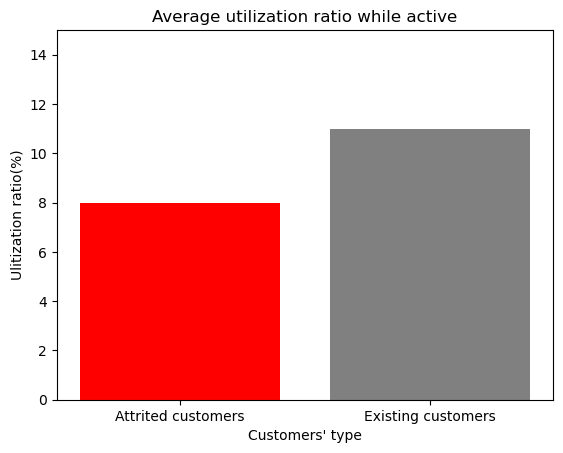

In [52]:
customers_type = ['Attrited customers','Existing customers']

plt.bar( x = customers_type, height = [Avg_ratio_Attrited * 100, Avg_ratio_Existing  * 100], color = ['red', 'grey'])
plt.ylabel('Ulitization ratio(%)')
plt.xlabel("Customers' type")
plt.ylim(0,15)
plt.title('Average utilization ratio while active')

plt.savefig('Average_utilization_ratio_while_active.png')

plt.show()


<Figure size 640x480 with 0 Axes>

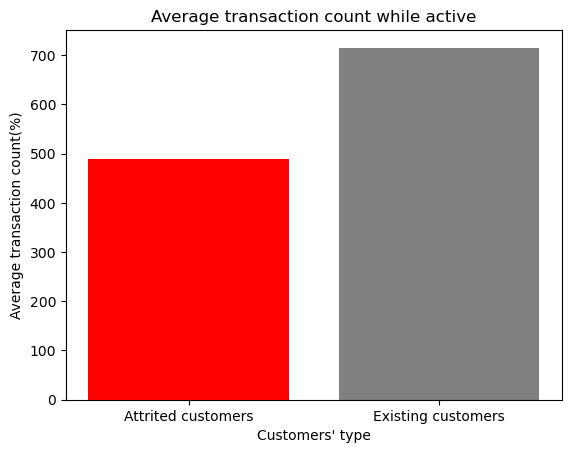

In [54]:
plt.bar( x = customers_type, height = [Avg_tran_count_attrited * 100, Avg_tran_count_existing  * 100], color = ['red', 'grey'])
plt.ylabel('Average transaction count(%)')
plt.xlabel("Customers' type")
plt.title('Average transaction count while active')

plt.savefig('Average_transaction_count_while_active.png')

plt.show()

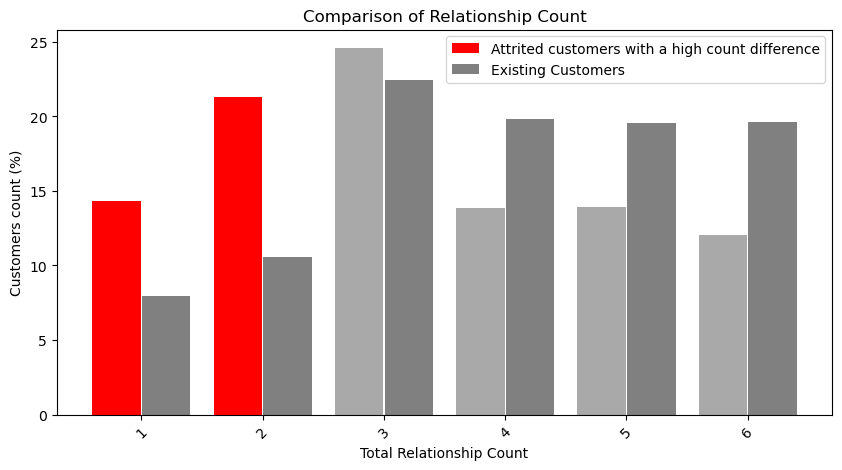

In [55]:
labels_relationship = range(1,7)
values_relationship_attrited = list(Relationship_percent_Attrited.values())
values_relationship_existing = list(Relationship_percent_Existing.values())

width = 0.4
spacing = 0.005
colors_attrited = ['red' if i < 2 else 'darkgray' for i in range(len(values_relationship_attrited))]


fig, ax = plt.subplots(figsize=(10, 5))

bars_attrited = ax.bar([i - width/2 - spacing for i in labels_relationship],
                       values_relationship_attrited,
                       width,
                       label="Attrited customers", color=colors_attrited)

bars_existing = ax.bar([i + width/2 + spacing for i in labels_relationship],
                       values_relationship_existing,
                       width,
                       label="Existing customers",
                       color='grey')

ax.set_xlabel("Total Relationship Count")
ax.set_ylabel("Customers count (%)")
ax.set_title("Comparison of Relationship Count")
ax.set_xticks(labels_relationship)
ax.set_xticklabels(labels_relationship, rotation=45)

ax.legend([bars_attrited[0], bars_existing[0]],
          ['Attrited customers with a high count difference', 'Existing Customers'],
          loc='upper right')
plt.savefig('Relationship_count_comparison')
plt.show()